<a href="https://colab.research.google.com/github/palomadevfullstack/olympic-analysis-ml/blob/main/notebooks/analise_olimpica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [9]:
# configurações para melhorar a visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# carregar dataset
try:
    df = pd.read_csv('athlete_events.csv')
except FileNotFoundError:
    print("Erro: Arquivo 'athlete_events.csv' não encontrado. Verifique o caminho.")
    exit()


# Primeiras inspeções

# 1. Visualizar as primeiras 5 linhas
print("--- Amostra dos Dados ---")
df.head()
print("\n")

# 2. Informações sobre as colunas, tipos e valores nulos
print("--- Informações do DataFrame ---")
df.info()
print("\n")

# 3. Estatísticas descritivas das colunas numéricas
print("--- Estatísticas Descritivas ---")
print(df.describe())

--- Amostra dos Dados ---


--- Informações do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


--- Estatísticas Descritivas ---
                  ID            Age         Height         Weight  \
count  271116.

Pergunta 1: Como o perfil físico (altura e peso) de atletas medalhistas em esportes contrastantes, como Natação e Ginástica Artística, evoluiu ao longo do tempo?

In [10]:
# ---- Análise 1: Evolução de Perfil Físico em Natação vs Ginástica Artística ----

# 1. Filtrar os dados para os esportes de interesse e apenas medalhistas
sports_of_interest = ['Swimming', 'Artistic Gymnastics']
df_sports = df[df['Sport'].isin(sports_of_interest)]
df_medals = df_sports.dropna(subset=['Medal']) # Pega apenas linhas onde a medalha não é nula

print(f"\nTotal de medalhistas em Natação e Ginástica Artística: {len(df_medals)}")


Total de medalhistas em Natação e Ginástica Artística: 3048


In [11]:
# 2. Remover linhas onde altura ou peso são nulos para esta análise
df_physical = df_medals.dropna(subset=['Height', 'Weight'])
print(f"Total de medalhistas com dados físicos: {len(df_physical)}")


Total de medalhistas com dados físicos: 2487


In [15]:
# 3. Agrupar por Ano, Esporte e Sexo e calcular a média de Altura e Peso
evolution= df_physical.groupby(['Year', 'Sport', 'Sex'])[['Height', 'Weight']].mean().reset_index()

# Arredondar para 2 casas decimais para melhor visualização
evolution[['Height', 'Weight']] = evolution[['Height', 'Weight']].round(2)

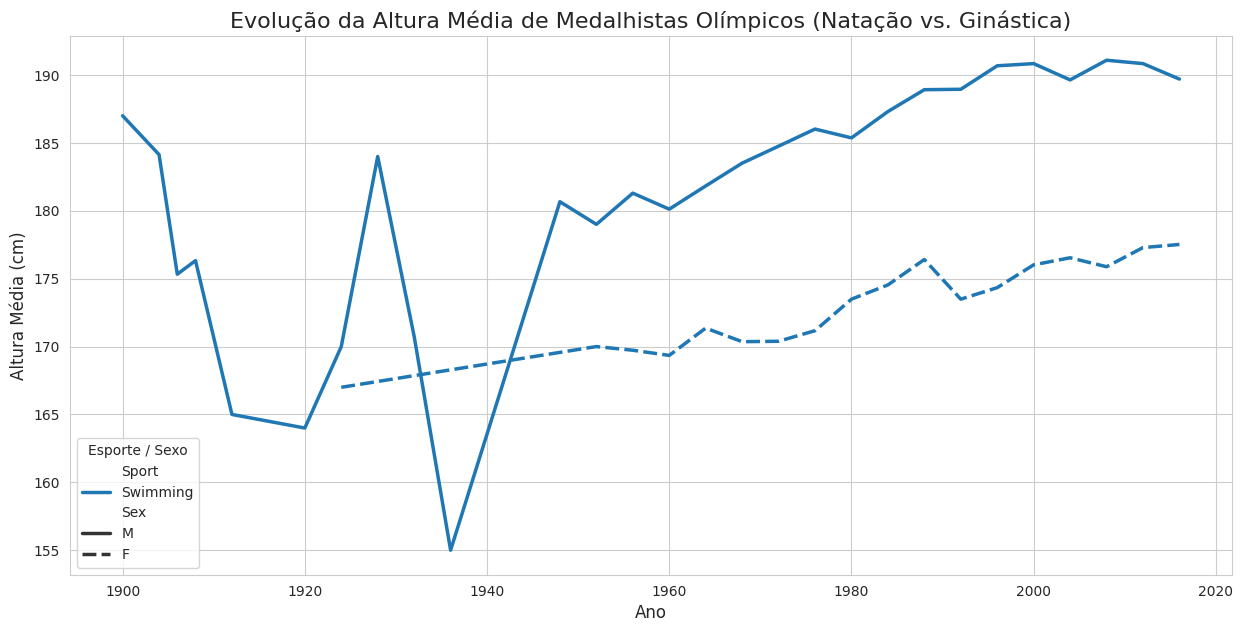

In [17]:
# 4. Visualizar os resultados

# Gráfico da Evolução da Altura Média
plt.figure(figsize=(15, 7))
sns.lineplot(data=evolution, x='Year', y='Height', hue='Sport', style='Sex', lw=2.5)
plt.title('Evolução da Altura Média de Medalhistas Olímpicos (Natação vs. Ginástica)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Altura Média (cm)', fontsize=12)
plt.legend(title='Esporte / Sexo')
plt.grid(True)
plt.show()

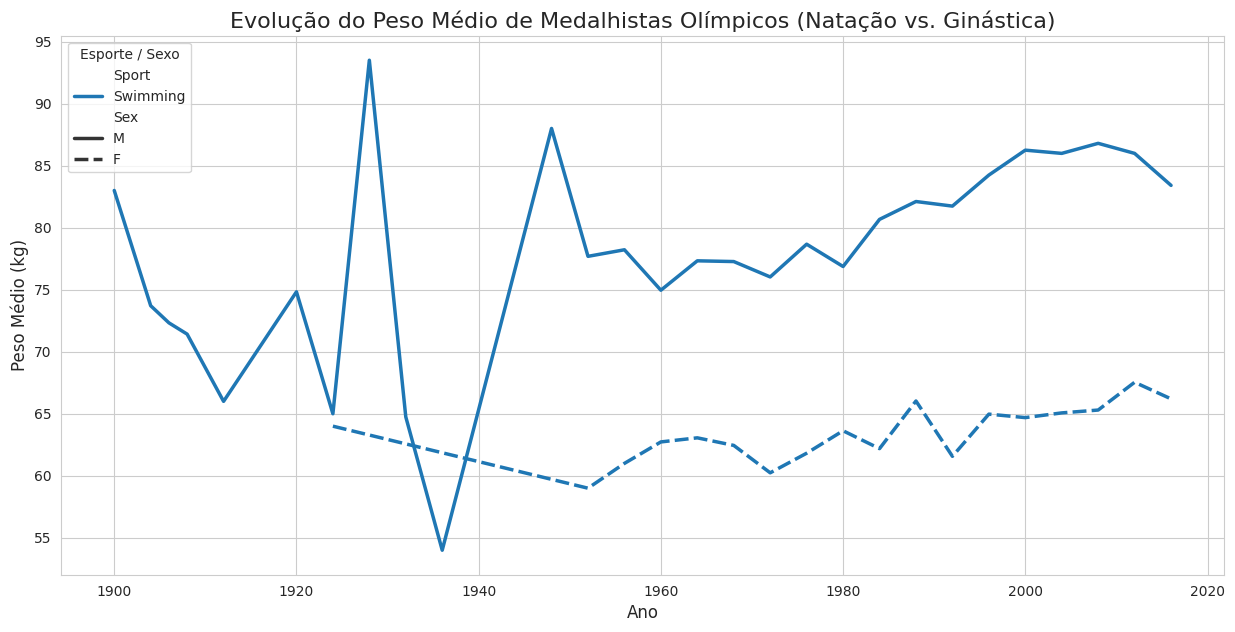

In [18]:
# Gráfico da Evolução do Peso Médio
plt.figure(figsize=(15, 7))
sns.lineplot(data=evolution, x='Year', y='Weight', hue='Sport', style='Sex', lw=2.5)
plt.title('Evolução do Peso Médio de Medalhistas Olímpicos (Natação vs. Ginástica)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Peso Médio (kg)', fontsize=12)
plt.legend(title='Esporte / Sexo')
plt.grid(True)
plt.show()

Pergunta 2: Quais países são as maiores potências olímpicas em número total de medalhas, e quais são os 'especialistas', ou seja, nações que concentram seu sucesso em poucas modalidades?

In [20]:
# --- Análise 2: Potências Olímpicas e Especialistas por Esporte ---

# 1. Obter um ranking geral de medalhas por país (Comitê Olímpico Nacional - NOC)
print("\n--- Top 15 Países por Número Total de Medalhas ---")
medalhas_por_pais = df.dropna(subset=['Medal'])['NOC'].value_counts().head(15)
print(medalhas_por_pais)


--- Top 15 Países por Número Total de Medalhas ---
NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
HUN    1135
NED    1040
NOR    1033
GDR    1005
CHN     989
Name: count, dtype: int64


/tmp/ipython-input-2089778984.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medalhas_por_pais.index, y=medalhas_por_pais.values, palette='viridis')


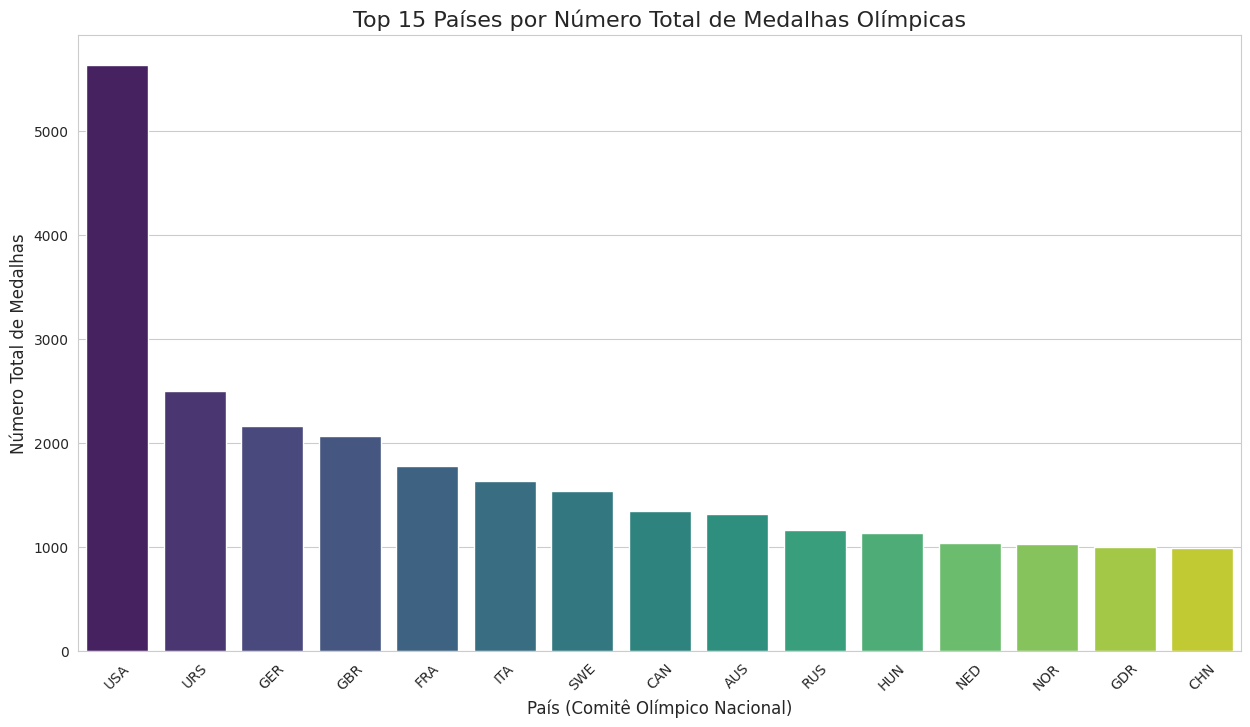

In [22]:
# Visualizar este ranking
plt.figure(figsize=(15, 8))
sns.barplot(x=medalhas_por_pais.index, y=medalhas_por_pais.values, palette='viridis')
plt.title('Top 15 Países por Número Total de Medalhas Olímpicas', fontsize=16)
plt.xlabel('País (Comitê Olímpico Nacional)', fontsize=12)
plt.ylabel('Número Total de Medalhas', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [23]:
# 2. Criar uma "Matriz de Força" para ver a distribuição de medalhas
# Usar uma pivot table para cruzar os países (NOC) com os esportes
df_medalhas = df.dropna(subset=['Medal'])

# Pegar a lista dos top 10 países para manter o gráfico legível
top_10_paises = medalhas_por_pais.head(10).index

# Filtrar o DataFrame para conter apenas esses países
df_top_10 = df_medalhas[df_medalhas['NOC'].isin(top_10_paises)]

# Criar a pivot table: Países nas linhas, Esportes nas colunas, contagem de medalhas como valores
matriz_forca = df_top_10.pivot_table(
    index='NOC',
    columns='Sport',
    values='Medal',
    aggfunc='count'
).fillna(0)


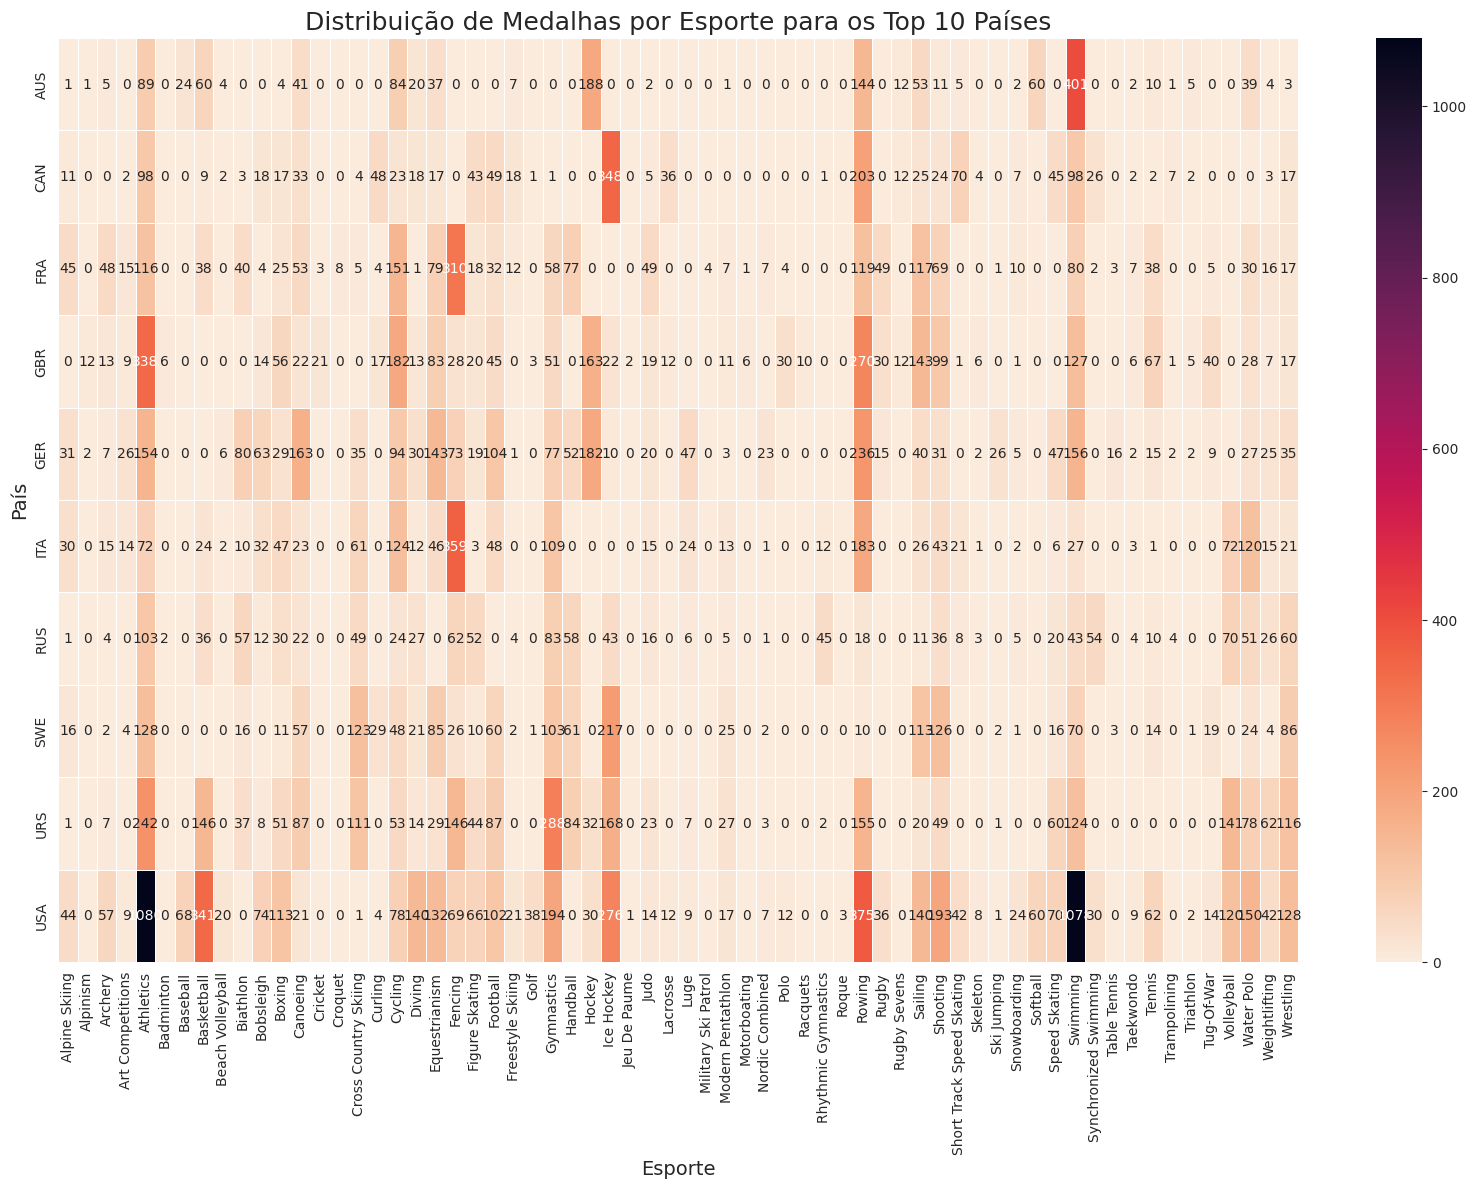

In [24]:
# 3. Visualizar a Matriz de Força com um Heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(
    matriz_forca,
    cmap='rocket_r', # Usando um mapa de cores invertido (cores mais escuras = mais medalhas)
    annot=True,     # anota o número de medalhas em cada célula
    fmt='.0f',      # formata a anotação como um número inteiro
    linewidths=.5
)
plt.title('Distribuição de Medalhas por Esporte para os Top 10 Países', fontsize=18)
plt.xlabel('Esporte', fontsize=14)
plt.ylabel('País', fontsize=14)
plt.show()

## Deep Dive (Brasil)

3.1 Quais são os esportes que historicamente mais renderam medalhas para o Brasil?

In [25]:
# --- Análise 3: Deep Dive no Brasil (BRA) ---

print("\n--- Iniciando Análise Focada no Brasil ---")

# 1. Filtrar o DataFrame para conter apenas medalhas do Brasil
df_brazil = df[df['NOC'] == 'BRA'].dropna(subset=['Medal'])

# Checar se o filtro funcionou
print(f"Total de medalhas olímpicas do Brasil no dataset: {len(df_brazil)}")


--- Iniciando Análise Focada no Brasil ---
Total de medalhas olímpicas do Brasil no dataset: 475


3.2 Como a performance do Brasil (total de medalhas) evoluiu ao longo das edições dos Jogos Olímpicos?

/tmp/ipython-input-3251257620.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sports_br.index, y=top_sports_br.values, palette='Greens_r')


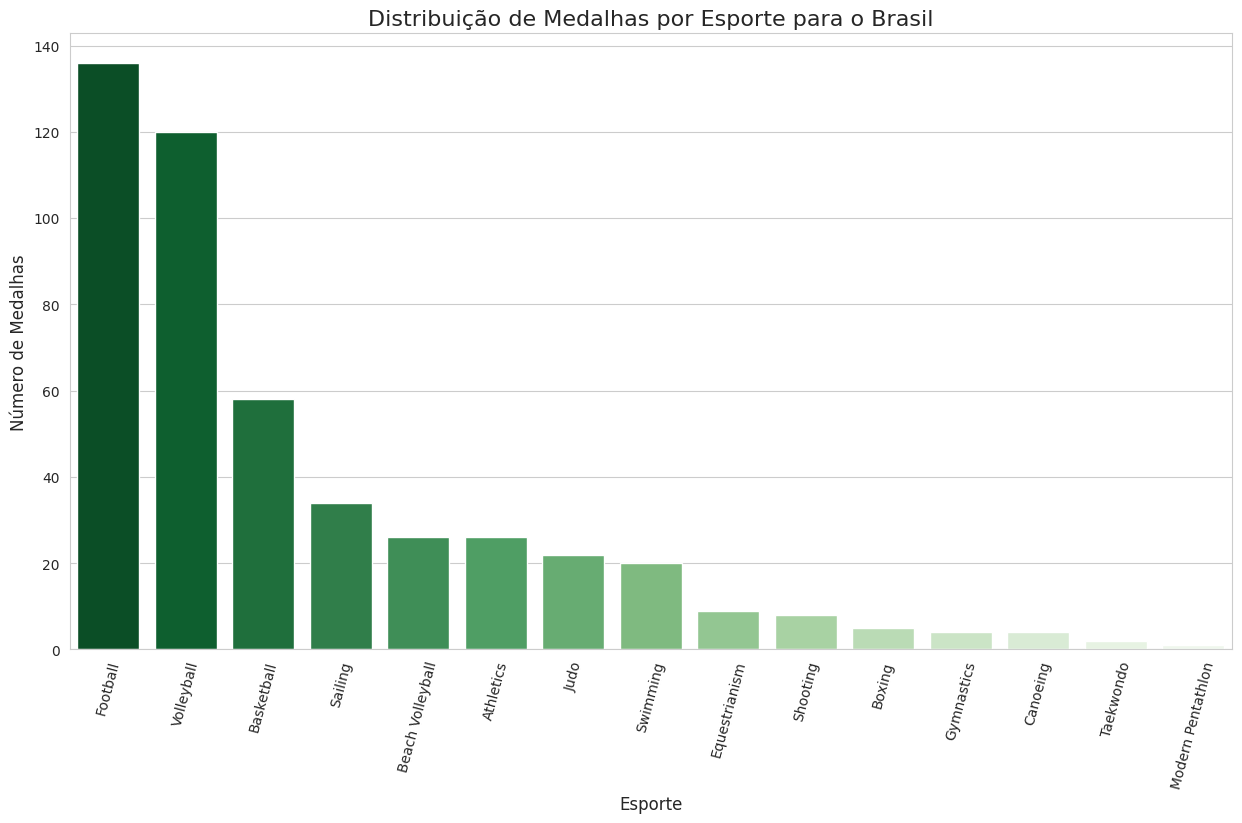

In [26]:
# 2. Análise dos Esportes mais vitoriosos para o Brasil
top_sports_br = df_brazil['Sport'].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(x=top_sports_br.index, y=top_sports_br.values, palette='Greens_r')
plt.title('Distribuição de Medalhas por Esporte para o Brasil', fontsize=16)
plt.xlabel('Esporte', fontsize=12)
plt.ylabel('Número de Medalhas', fontsize=12)
plt.xticks(rotation=75) # Rotacionar os nomes dos esportes para melhor leitura
plt.show()

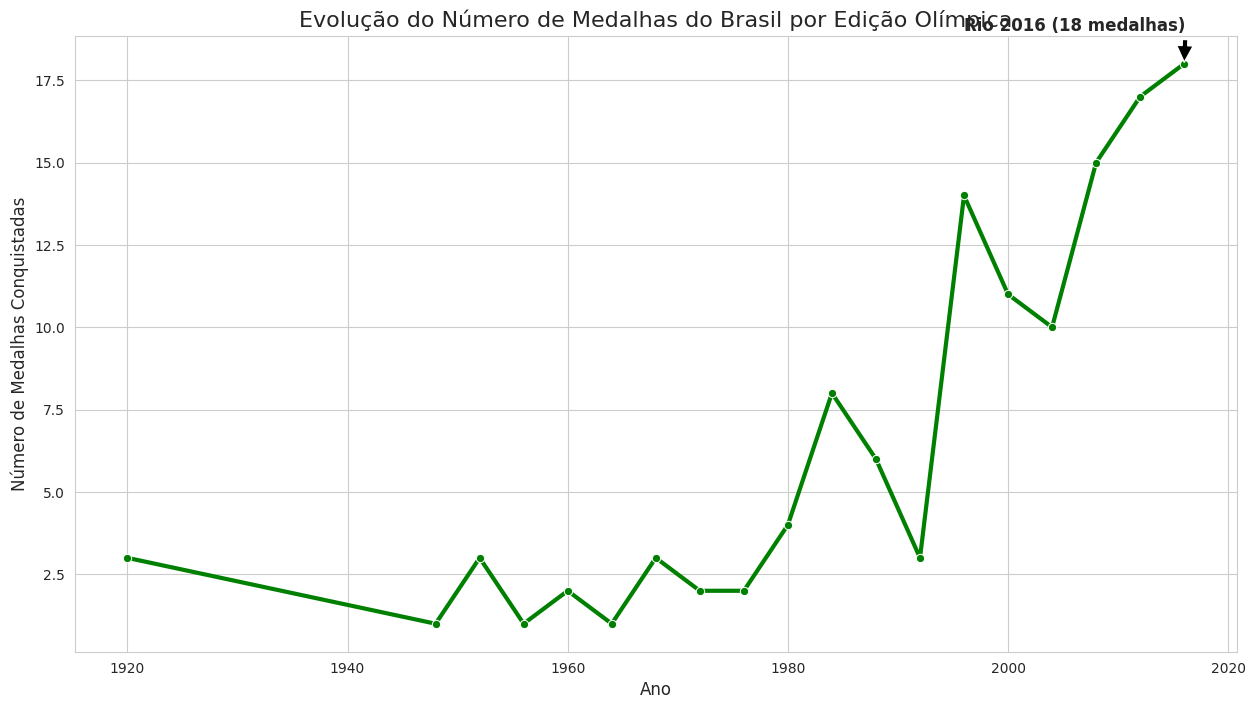

In [27]:
# 3. Análise da Evolução de Medalhas do Brasil por Ano
# Vamos contar as medalhas por ano de edição dos Jogos
# Usamos .unique() nos 'Games' para não contar medalhas de equipe múltiplas vezes por evento
# Ex: Ouro no Vôlei conta como 1, não como 12.
medalhas_por_ano = df_brazil.groupby('Year')['Event'].nunique().reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(data=medalhas_por_ano, x='Year', y='Event', lw=3, marker='o', color='green')
plt.title('Evolução do Número de Medalhas do Brasil por Edição Olímpica', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Medalhas Conquistadas', fontsize=12)

# Adicionar uma anotação para destacar as Olimpíadas do Rio 2016
ano_rio = 2016
medalhas_rio = medalhas_por_ano[medalhas_por_ano['Year'] == ano_rio]['Event'].iloc[0]
plt.annotate(
    f'Rio 2016 ({medalhas_rio} medalhas)',
    xy=(ano_rio, medalhas_rio),
    xytext=(ano_rio - 20, medalhas_rio + 1),
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=12,
    fontweight='bold'
)
plt.grid(True)
plt.show()

3.3 Qual é a distribuição das medalhas brasileiras entre Ouro, Prata e Bronze?

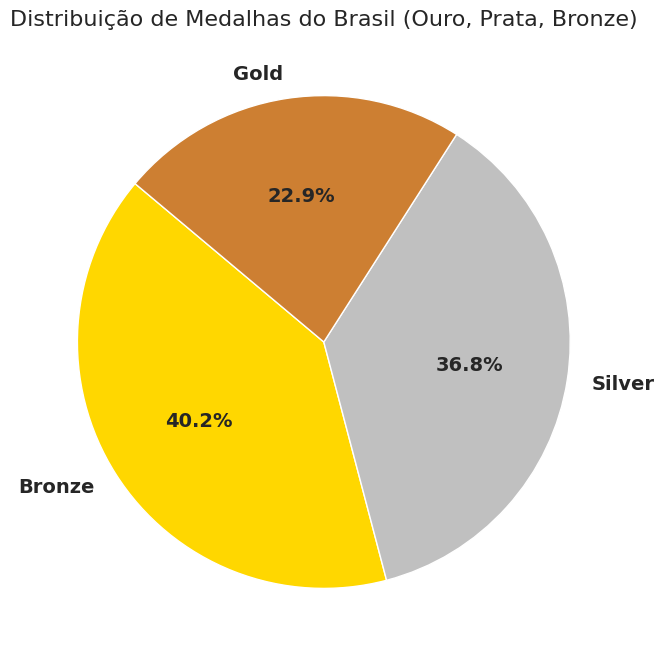

In [28]:
# 4. Distribuição entre Ouro, Prata e Bronze
medal_distribution_br = df_brazil['Medal'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(
    medal_distribution_br,
    labels=medal_distribution_br.index,
    autopct='%1.1f%%', # Formata para mostrar a porcentagem
    colors=['#FFD700', '#C0C0C0', '#CD7F32'], # Cores para Ouro, Prata e Bronze
    startangle=140,
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)
plt.title('Distribuição de Medalhas do Brasil (Ouro, Prata, Bronze)', fontsize=16)
plt.ylabel('') # Remove o label 'Medal' que o pie chart adiciona por padrão
plt.show()


## Machine Learning

É possível prever a probabilidade de um atleta ganhar uma medalha com base em seus dados?

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
# --- Preparação dos Dados para Machine Learning ---

print("\n--- Iniciando Pré-processamento para ML ---")

# 1. Seleção de Features (Colunas) e Criação da Variável Alvo (Target)
# usar um subconjunto do DataFrame original para simplificar
features = ['Age', 'Height', 'Weight', 'Sex', 'NOC', 'Sport']
df_ml = df[features + ['Medal']].copy() # .copy() para evitar warnings

# Criar a variável alvo 'Medal_Won' (1 para quem ganhou medalha, 0 para quem não ganhou)
df_ml['Medal_Won'] = df_ml['Medal'].notna().astype(int)
df_ml.drop('Medal', axis=1, inplace=True)



--- Iniciando Pré-processamento para ML ---


In [32]:
# 2. Tratamento de Valores Faltantes (NaN)
# Preencher NaN em colunas numéricas com a mediana é uma abordagem robusta
for col in ['Age', 'Height', 'Weight']:
    median_value = df_ml[col].median()
    df_ml[col].fillna(median_value, inplace=True)
    print(f"Valores nulos em '{col}' preenchidos com a mediana: {median_value}")

Valores nulos em 'Age' preenchidos com a mediana: 24.0
Valores nulos em 'Height' preenchidos com a mediana: 175.0
Valores nulos em 'Weight' preenchidos com a mediana: 70.0


/tmp/ipython-input-351681968.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ml[col].fillna(median_value, inplace=True)


In [33]:
# 3. Conversão de Variáveis Categóricas em Numéricas (One-Hot Encoding)
# Modelos de ML não entendem texto, então transformamos 'Sex', 'NOC' e 'Sport' em colunas de 0s e 1s
df_ml_encoded = pd.get_dummies(df_ml, columns=['Sex', 'NOC', 'Sport'], drop_first=True)
print("\nDataFrame transformado com One-Hot Encoding.")


DataFrame transformado com One-Hot Encoding.


In [34]:
# 4. Separar Features (X) e Alvo (y)
X = df_ml_encoded.drop('Medal_Won', axis=1)
y = df_ml_encoded['Medal_Won']

In [36]:
# 5. Dividir os dados em Conjunto de Treino e Conjunto de Teste
# 80% dos dados para treino, 20% para teste. random_state para garantir que a divisão seja sempre a mesma.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# 'stratify=y' é importante aqui para garantir que a proporção de medalhistas seja a mesma nos datasets de treino e teste

In [37]:
print("\n--- Dados Prontos para Treinamento ---")
print(f"Formato de X_train (features de treino): {X_train.shape}")
print(f"Formato de X_test (features de teste): {X_test.shape}")
print(f"Formato de y_train (alvo de treino): {y_train.shape}")
print(f"Formato de y_test (alvo de teste): {y_test.shape}")
print(f"\nProporção de medalhistas no dataset de treino: {y_train.mean():.4f}")
print(f"Proporção de medalhistas no dataset de teste: {y_test.mean():.4f}")


--- Dados Prontos para Treinamento ---
Formato de X_train (features de treino): (216892, 298)
Formato de X_test (features de teste): (54224, 298)
Formato de y_train (alvo de treino): (216892,)
Formato de y_test (alvo de teste): (54224,)

Proporção de medalhistas no dataset de treino: 0.1467
Proporção de medalhistas no dataset de teste: 0.1467


In [40]:
# Treinamento
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [42]:
# --- Treinamento do Modelo de Machine Learning ---

print("\n--- Iniciando Treinamento do Modelo ---")

# 1. Inicializar o modelo
# Usar max_iter=1000 para garantir que o modelo tenha iterações suficientes para convergir.
model = LogisticRegression(max_iter=1000)


--- Iniciando Treinamento do Modelo ---


In [43]:
# 2. Treinar o modelo com os dados de treino
print("Treinando o modelo de Regressão Logística...")
model.fit(X_train, y_train)
print("Treinamento concluído!")

Treinando o modelo de Regressão Logística...
Treinamento concluído!


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
# 3. Fazer previsões com os dados de teste
# O modelo nunca viu esses dados antes, então é um teste justo de sua performance.
y_pred = model.predict(X_test)

In [45]:
# 4. Avaliar a performance do modelo
print("\n--- Avaliação do Modelo nos Dados de Teste ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia Geral: {accuracy:.4f}")


--- Avaliação do Modelo nos Dados de Teste ---
Acurácia Geral: 0.8571


In [46]:
# O Classification Report é a melhor forma de avaliar um modelo de classificação.
# Ele dá a Precisão, Recall e F1-Score para cada classe.
print("\nRelatório de Classificação Detalhado:")
print(classification_report(y_test, y_pred, target_names=['Não Ganhou Medalha (0)', 'Ganhou Medalha (1)']))


Relatório de Classificação Detalhado:
                        precision    recall  f1-score   support

Não Ganhou Medalha (0)       0.86      0.99      0.92     46267
    Ganhou Medalha (1)       0.60      0.08      0.14      7957

              accuracy                           0.86     54224
             macro avg       0.73      0.53      0.53     54224
          weighted avg       0.82      0.86      0.81     54224



In [47]:
## -- Treinamento avançado para melhorar acurácia utilizando o Random Forest
from sklearn.ensemble import RandomForestClassifier

In [49]:
# --- Treinamento do Modelo Avançado: Random Forest ---

print("\n\n--- Iniciando Treinamento do Modelo Avançado: Random Forest ---")

# 1. Inicializar o modelo
# n_jobs=-1 usa todos os processadores do computador para acelerar o treinamento.
# random_state=42 garante que o resultado seja o mesmo toda vez que rodarmos.
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)



--- Iniciando Treinamento do Modelo Avançado: Random Forest ---


In [51]:
# 2. Treinar o modelo
# Este passo pode demorar um pouco mais que o anterior.
print("Treinando o modelo Random Forest... (isso pode levar alguns minutos)")
rf_model.fit(X_train, y_train)
print("Treinamento do Random Forest concluído!")

Treinando o modelo Random Forest... (isso pode levar alguns minutos)
Treinamento do Random Forest concluído!


In [53]:
# 3. Fazer previsões com os dados de teste
y_pred_rf = rf_model.predict(X_test)

In [55]:
# 4. Avaliar a performance do novo modelo
print("\n--- Avaliação do Modelo Random Forest nos Dados de Teste ---")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia Geral (Random Forest): {accuracy_rf:.4f}")


--- Avaliação do Modelo Random Forest nos Dados de Teste ---
Acurácia Geral (Random Forest): 0.8634


In [56]:
print("\nRelatório de Classificação Detalhado (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=['Não Ganhou Medalha (0)', 'Ganhou Medalha (1)']))


Relatório de Classificação Detalhado (Random Forest):
                        precision    recall  f1-score   support

Não Ganhou Medalha (0)       0.90      0.95      0.92     46267
    Ganhou Medalha (1)       0.55      0.38      0.45      7957

              accuracy                           0.86     54224
             macro avg       0.72      0.66      0.69     54224
          weighted avg       0.85      0.86      0.85     54224



In [57]:
# --- Etapa Final: Interpretando o Modelo Random Forest ---

print("\n\n--- Interpretando o Modelo: Features Mais Importantes ---")




--- Interpretando o Modelo: Features Mais Importantes ---


In [58]:
# 1. Extrair a importância de cada feature do modelo treinado
importances = rf_model.feature_importances_
feature_names = X_train.columns

In [59]:
# 2. Criar um DataFrame para facilitar a visualização
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [60]:
# 3. Ordenar o DataFrame pela importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

/tmp/ipython-input-2980444852.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


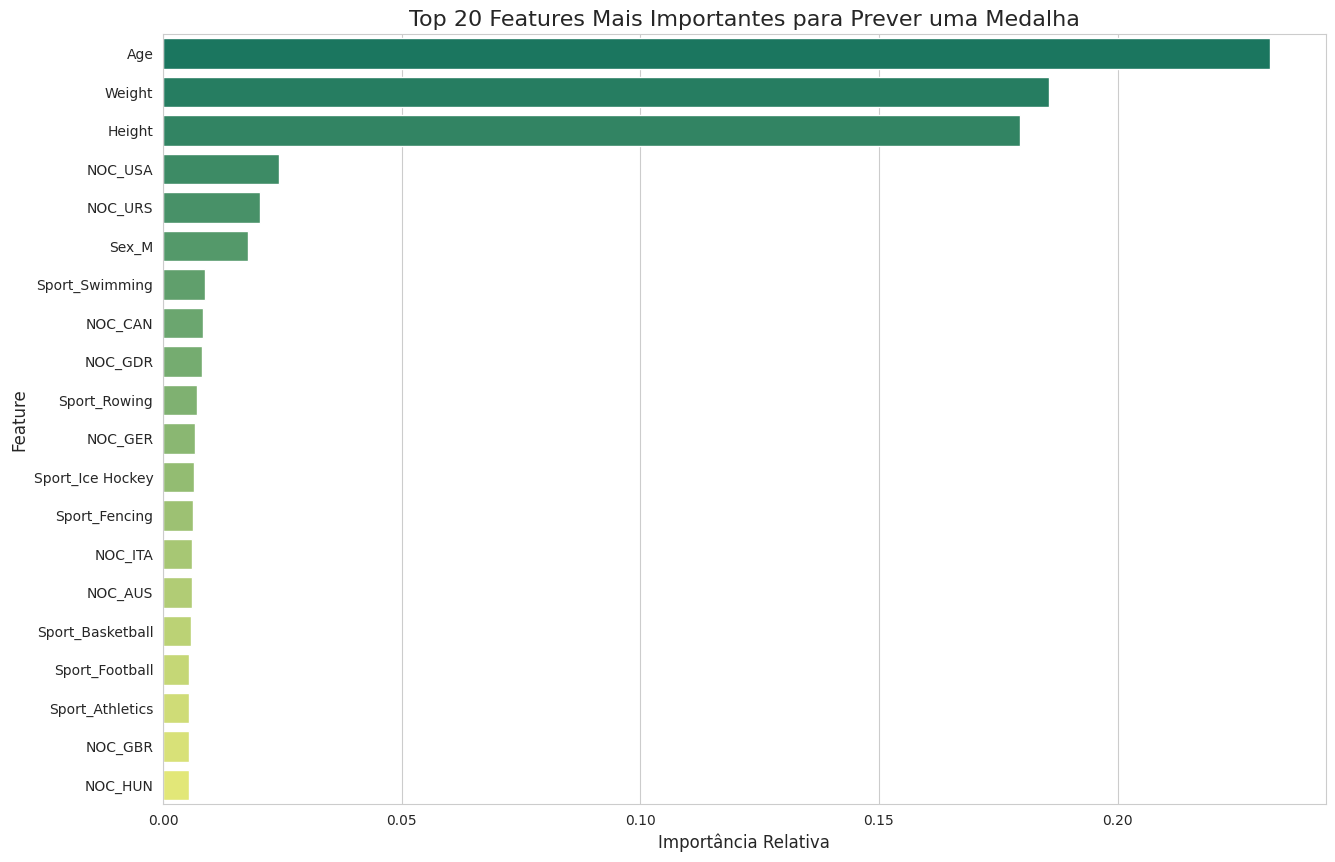

In [61]:
# 4. Visualizar as 20 features mais importantes
plt.figure(figsize=(15, 10))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.head(20), # Pegando as top 20
    palette='summer'
)
plt.title('Top 20 Features Mais Importantes para Prever uma Medalha', fontsize=16)
plt.xlabel('Importância Relativa', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()